# ESERCIZIO 1

Esercizio 1.1

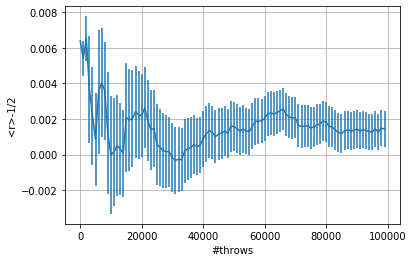

In [12]:
import numpy as np
import os
import matplotlib.pyplot as plt
import math

# Function for statistical uncertainty estimation
def error(AV,AV2,n): 
    if n==0:
        return 0
    else:
        return math.sqrt((AV2[n] - AV[n]**2)/n)

# importo i numeri generati  
filename='random_numbers.txt'
file=open(filename)
rawdatas=file.readlines()
RandomNumbers=np.zeros(len(rawdatas))
RandomNumbers=[float(rawdatas[i].strip('\n')) for i in range(0,len(RandomNumbers))]

# 
M=len(RandomNumbers)  # Total number of throws
N=100                 # Number of blocks
L=int(M/N)            # Number of throws in each block, please use for M a multiple of N
x = np.arange(N)      # [0,1,2,...,N-1]
ave = np.zeros(N)
av2 = np.zeros(N)
sum_prog = np.zeros(N)
su2_prog = np.zeros(N)
err_prog = np.zeros(N)

for i in range(N):
    sum = 0
    for j in range(L):
        k = j+i*L
        sum += RandomNumbers[k]
    ave[i] = sum/L       # r_i 
    av2[i] = (ave[i])**2 # (r_i)^2 

for i in range(N):
    for j in range(i+1):
        sum_prog[i] += ave[j] # SUM_{j=0,i} r_j
        su2_prog[i] += av2[j] # SUM_{j=0,i} (r_j)^2
    sum_prog[i]/=(i+1) # Cumulative average
    su2_prog[i]/=(i+1) # Cumulative square average
    err_prog[i] = error(sum_prog,su2_prog,i) # Statistical uncertainty
    
x*=L # Number of throws = block * (Number of throws in each block)
plt.errorbar(x,sum_prog-0.5,yerr=err_prog)
plt.xlabel('#throws')
plt.ylabel('<r>-1/2')
plt.grid(True)
plt.show()
